In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the data
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'NSL_regular_season_data_2.csv')
print(data_path)
data = pd.read_csv(data_path)

/workspaces/Wharton-HS-Competition-Soccer-Playoff-Predictions/data/NSL_regular_season_data_2.csv


In [16]:
# Visualize the data
data

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,TUC,WIC,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33
472,game_2023_36,DOV,WIC,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31
473,game_2023_269,SFS,WIC,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54
474,game_2023_298,ALB,WIC,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43


In [17]:
# Create a new column called 'Winner' that contains 1 if team wins, 0 if team loses
data['Winner'] = data['HomeScore'] > data['AwayScore']

# Drop the 'HomeScore' and 'AwayScore' columns
data = data.drop(['HomeScore', 'AwayScore'], axis=1)

In [18]:
# Visualize the mean and spread of the data
data.describe()

,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
count,476.000000,476.000000,476.000000,476.00000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.612752,0.997605,15.178571,11.10084,5.401261,4.266807,0.042017,0.018908,0.264706,0.111345,0.518004
std,0.717091,0.526305,5.487176,4.51644,2.766856,2.248328,0.211061,0.150996,0.508138,0.346710,0.085601
min,0.200000,0.060000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000
25%,1.110000,0.590000,12.000000,8.00000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.450000
50%,1.540000,0.970000,15.000000,11.00000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.530000
75%,2.102500,1.320000,19.000000,14.00000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.570000
max,4.030000,2.630000,30.000000,23.00000,16.000000,11.000000,2.000000,2.000000,2.000000,2.000000,0.770000


In [19]:
# Split the data into a feature matrix and a target vector
X = data
y = data['Winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(X_train, target = 'Winner', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Winner
2,Target type,Binary
3,Original data shape,"(357, 15)"
4,Transformed data shape,"(357, 15)"
5,Transformed train set shape,"(249, 15)"
6,Transformed test set shape,"(108, 15)"
7,Numeric features,11
8,Categorical features,3
9,Preprocess,True


In [21]:
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:55:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7027,0.7643,0.5100,0.6906,0.5720,0.3555,0.3731,0.1040
ridge,Ridge Classifier,0.6903,0.0000,0.4200,0.6998,0.5082,0.3093,0.3373,0.0800
et,Extra Trees Classifier,0.6387,0.6410,0.2200,0.7571,0.2944,0.1523,0.2274,0.2030
nb,Naive Bayes,0.5983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0810
dt,Decision Tree Classifier,0.5983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0850
rf,Random Forest Classifier,0.5983,0.6620,0.0000,0.0000,0.0000,0.0000,0.0000,0.2220
qda,Quadratic Discriminant Analysis,0.5983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0670
ada,Ada Boost Classifier,0.5983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0640
gbc,Gradient Boosting Classifier,0.5983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1240
lda,Linear Discriminant Analysis,0.5983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0770


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

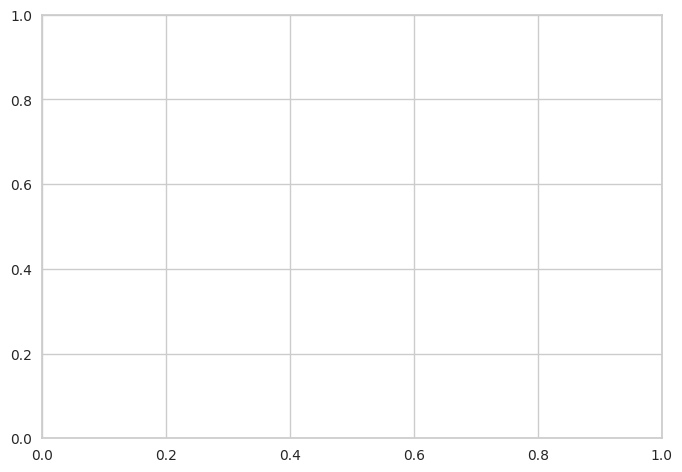

In [22]:
s.evaluate_model(best)

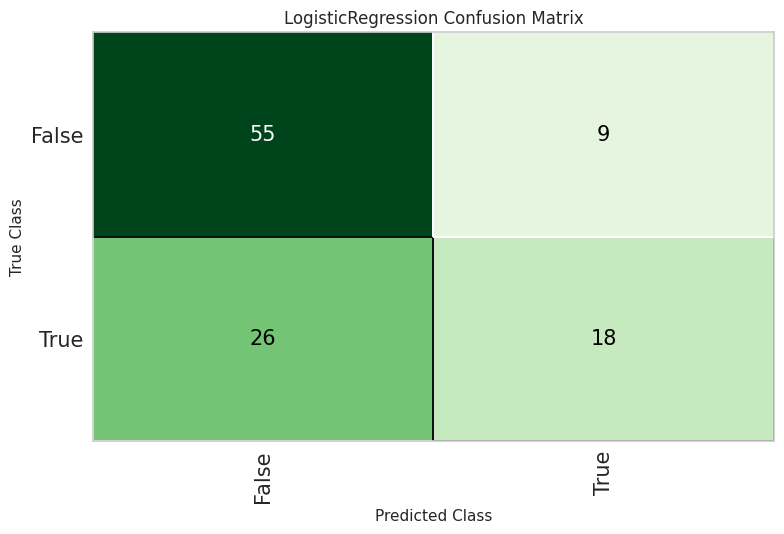

In [23]:
s.plot_model(best, plot = 'confusion_matrix')

In [24]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6759,0.7244,0.4091,0.6667,0.5070,0.2857,0.3046


,game_id,HomeTeam,AwayTeam,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,Winner,prediction_label,prediction_score
156,game_2023_291,TAC,FAR,1.44,0.86,10,17,3,7,0,1,0,2,0.60,False,0,0.6234
437,game_2023_265,ANC,TOL,2.40,0.71,18,9,3,6,0,0,0,0,0.51,True,1,0.5544
292,game_2023_184,ANC,OAK,2.86,0.21,28,4,3,5,0,0,1,0,0.64,True,1,0.7379
269,game_2023_420,JAC,MAN,1.14,1.08,15,3,4,0,0,0,0,0,0.54,False,0,0.8607
154,game_2023_410,SAS,FAR,1.61,1.08,13,11,5,4,0,0,0,0,0.67,True,0,0.6698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,game_2023_283,SPR,AUG,0.73,0.99,16,13,3,4,0,0,1,1,0.35,True,0,0.7435
17,game_2023_289,REN,ANC,0.55,0.13,3,18,3,4,0,0,1,1,0.54,False,1,0.7166
297,game_2023_20,BAK,OAK,1.27,1.64,9,20,2,3,0,0,0,0,0.55,False,0,0.8273
428,game_2023_132,JAC,TOL,0.53,0.63,6,9,4,2,0,0,1,0,0.59,True,0,0.6146


In [25]:
predictions = s.predict_model(best, data=X_test, raw_score=True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6807,0.7223,0.3902,0.5517,0.4571,0.2403,0.2475


,game_id,HomeTeam,AwayTeam,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,Winner,prediction_label,prediction_score_0,prediction_score_1
11,game_2023_241,OAK,ALB,1.60,1.43,12,19,7,5,0,0,0,0,0.47,False,0,0.6981,0.3019
5,game_2023_27,FAR,ALB,2.26,1.16,17,10,8,6,0,0,1,0,0.69,True,1,0.4709,0.5291
72,game_2023_174,JAC,BOI,0.52,1.18,17,10,9,3,0,0,0,0,0.56,False,0,0.8736,0.1264
217,game_2023_103,SJU,LAR,1.61,1.09,14,9,4,2,0,0,0,0,0.32,False,0,0.7695,0.2305
114,game_2023_86,LAR,DES,1.36,0.60,17,10,5,2,0,0,0,0,0.40,True,0,0.6721,0.3279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,game_2023_113,TUC,FOR,2.80,1.36,21,9,10,3,0,0,0,0,0.40,True,0,0.6602,0.3398
285,game_2023_439,TOL,MOB,0.93,1.29,8,8,5,5,0,0,0,0,0.44,False,0,0.7971,0.2029
79,game_2023_138,OAK,BOI,0.72,1.39,4,18,5,4,0,0,0,0,0.54,False,0,0.7761,0.2239
216,game_2023_295,CHM,LAR,1.47,1.20,15,11,6,3,0,0,1,0,0.53,False,0,0.6994,0.3006


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

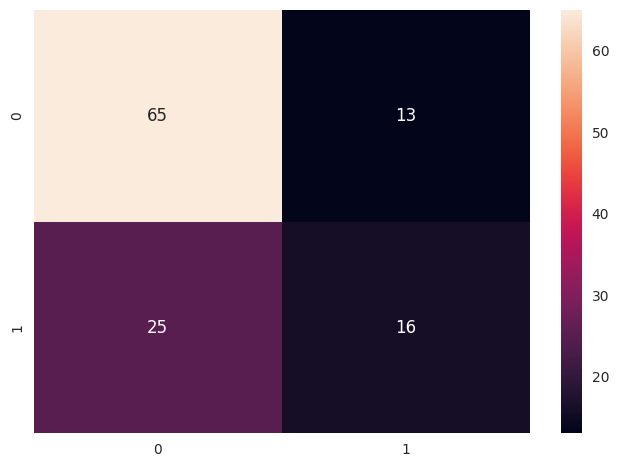

In [26]:
# Show confusion matrix for predictions
conf_matrix = confusion_matrix(predictions['Winner'], predictions['prediction_label'])
sns.heatmap(conf_matrix, annot=True)

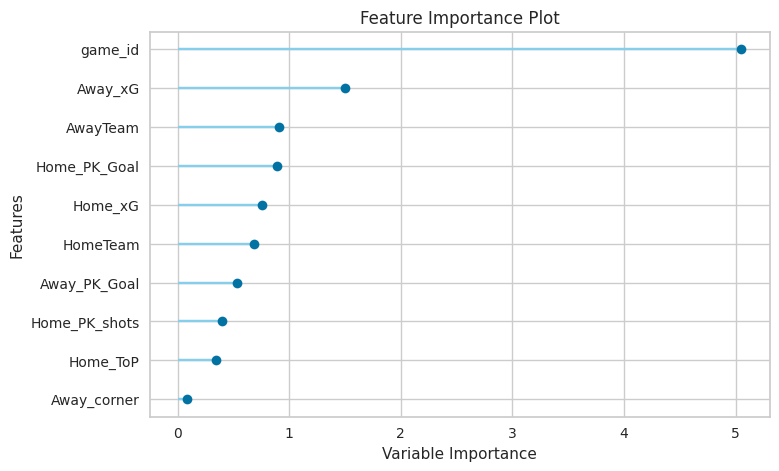

In [27]:
# Try to view feature importances for the model if applicable
try:
    s.plot_model(best, plot = 'feature')
except:
    print('Feature importances not available for this model')

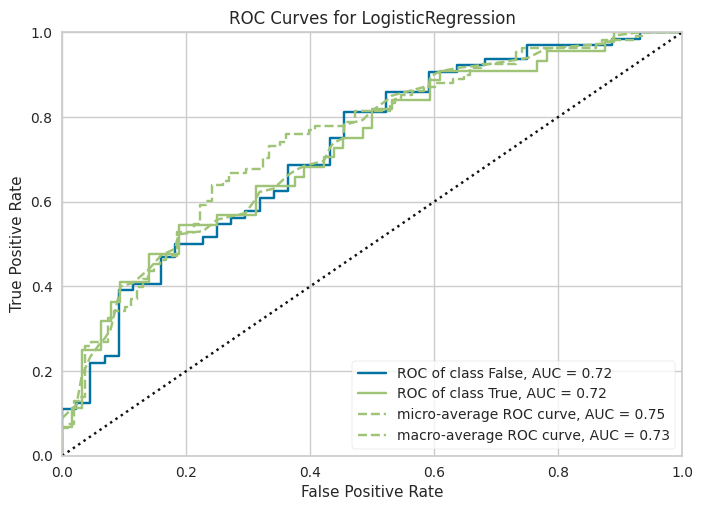

In [28]:
try:
    s.plot_model(best, plot = 'auc')
except:
    print('AUC not available for this model')

In [29]:
s.save_model(best, 'best_pycaret_whole_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Home_xG', 'Away_xG', 'Home_shots',
                                              'Away_shots', 'Home_corner',
                                              'Away_corner', 'Home_PK_Goal',
                                              'Away_PK_Goal', 'Home_PK_shots',
                                              'Away_PK_shots', 'Home_ToP'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fal...
                                                               handle_unknown='value',
                                                               hie